In [ ]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.22.2.post1
seaborn: 0.10.1


In [ ]:
#import libraries
import io
import math
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas.util.testing as tm
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

In [ ]:
#Load datasets
titanic_data=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.describe()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [ ]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_data.isnull()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
women=titanic_data.loc[titanic_data.Sex=='female']["Survived"]
rate_women=sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
def bar_chart(feature):
    survived=titanic_data[titanic_data['Survived']==1][feature].value_counts()
    dead=titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

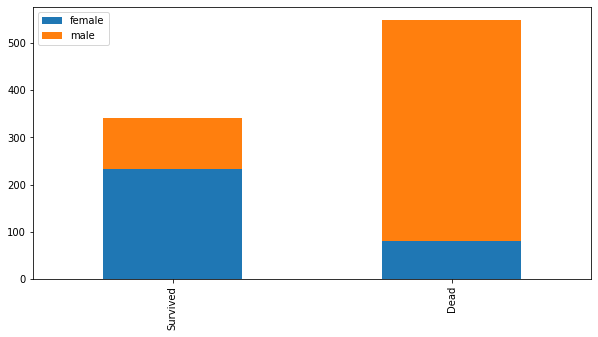

In [ ]:
#confirms women are more likely to survive than men
bar_chart('Sex')

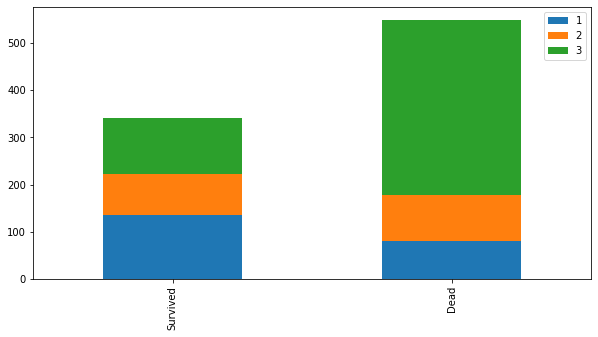

In [ ]:
#confirms first class is more likely to survive than second or third
bar_chart('Pclass')

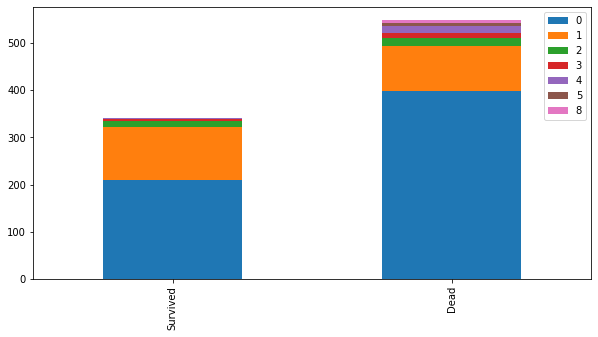

In [ ]:
bar_chart('SibSp')

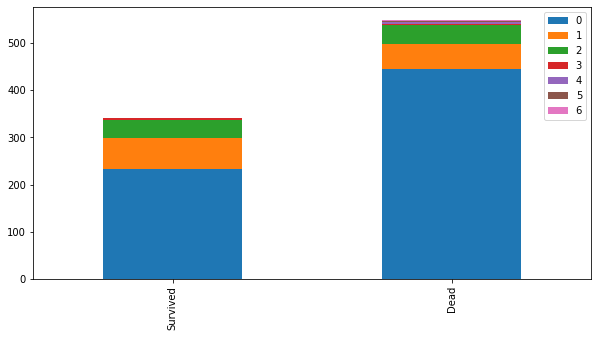

In [ ]:
bar_chart('Parch')

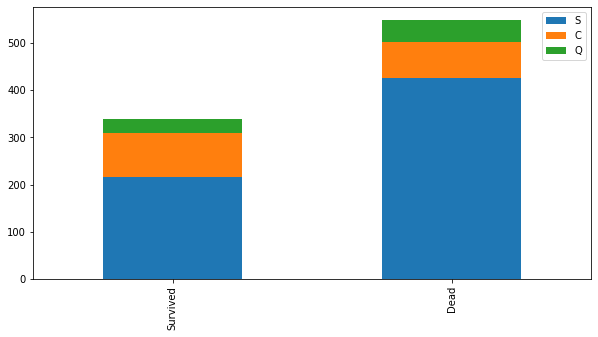

In [ ]:
bar_chart('Embarked')

In [ ]:
#combine train and test dataset
train_test_data=[titanic_data, test_data]

In [ ]:
#extract title from name
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
titanic_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Lady          1
Mme           1
Sir           1
Capt          1
Countess      1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
#assign a number to a title
title_mapping={"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3, "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


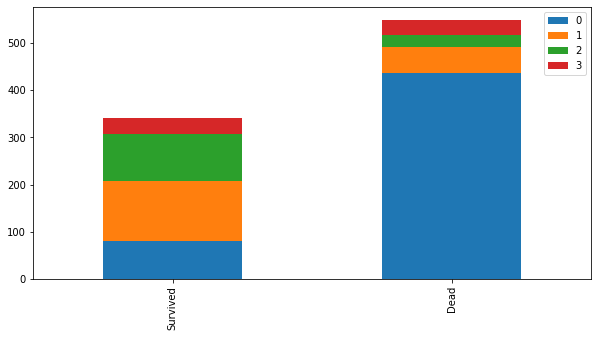

In [ ]:
bar_chart('Title')

In [ ]:
#delete name from datasets
titanic_data.drop('Name', axis=1,inplace=True)
test_data.drop('Name', axis=1,inplace=True)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
#map the sex
sex_mapping={"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

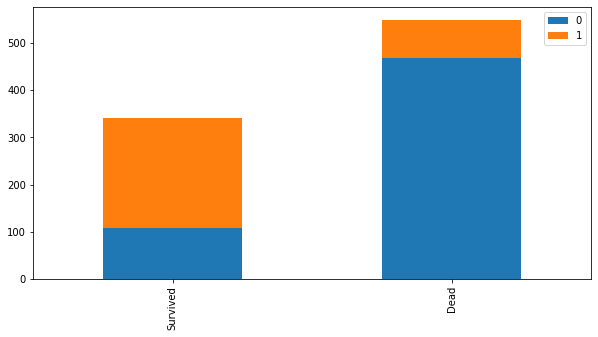

In [ ]:
bar_chart('Sex')

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,NaN,0,0,359309,8.0500,NaN,S,0


In [ ]:
#fill missing age with median age for each title
titanic_data["Age"].fillna(titanic_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

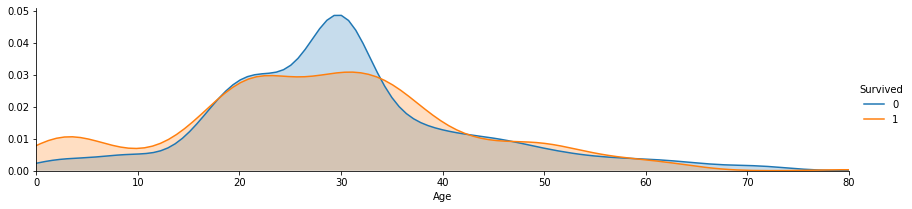

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

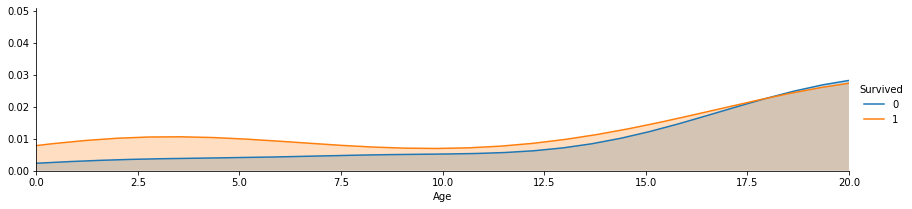

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 30.0)

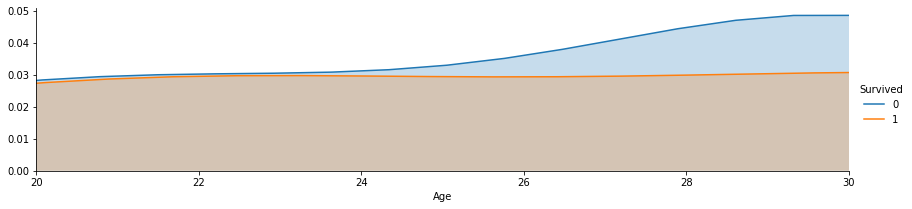

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30.0, 40.0)

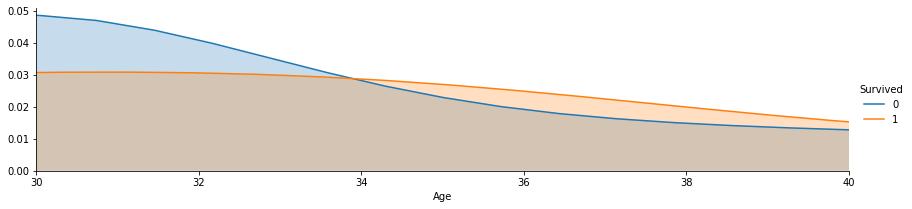

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40.0, 60.0)

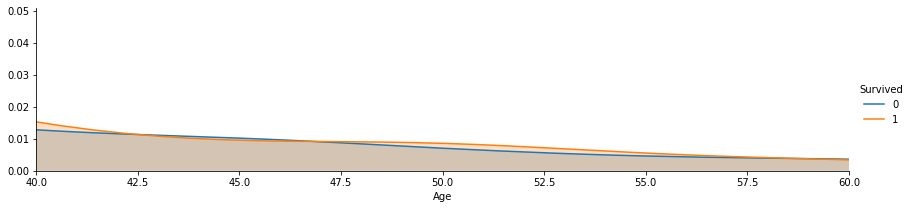

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

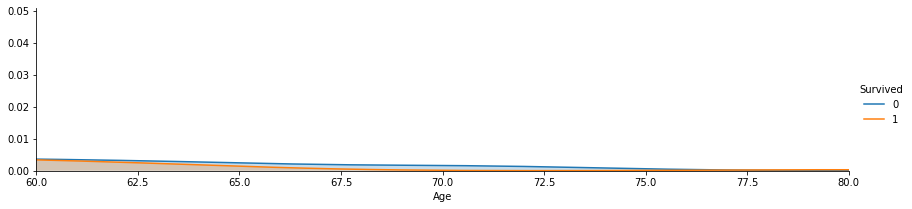

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age']<=16,'Age']=0, 
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <=26),'Age']=1,
    dataset.loc[(dataset['Age'] >26) & (dataset['Age'] <=36),'Age']=2,
    dataset.loc[(dataset['Age'] >36) & (dataset['Age'] <=62),'Age']=3,
    dataset.loc[ dataset['Age'] >62,'Age']=4

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,S,0


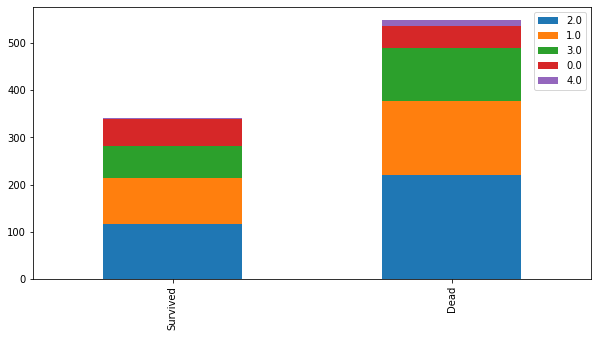

In [ ]:
bar_chart('Age')

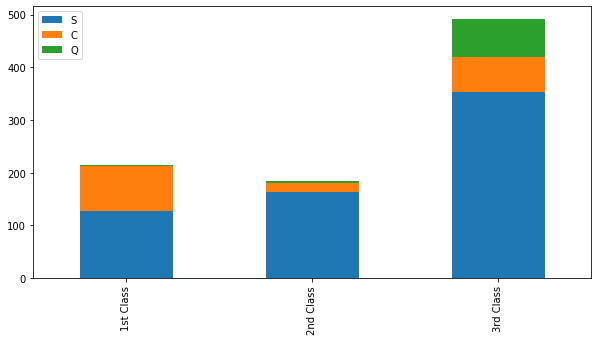

In [ ]:
Pclass1=titanic_data[titanic_data['Pclass']==1]['Embarked'].value_counts()
Pclass2=titanic_data[titanic_data['Pclass']==2]['Embarked'].value_counts()
Pclass3=titanic_data[titanic_data['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,S,0


In [ ]:
embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,1,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,0,0


In [ ]:
#fill missing fare with median fare for each Pclass
titanic_data["Fare"].fillna(titanic_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

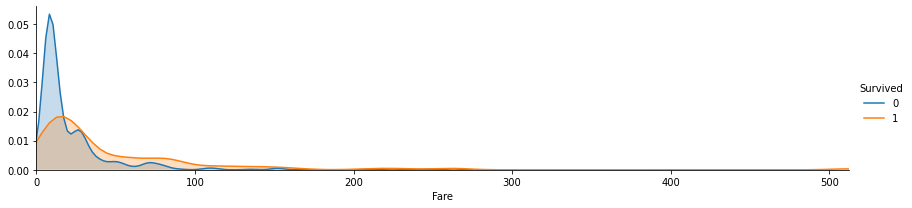

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

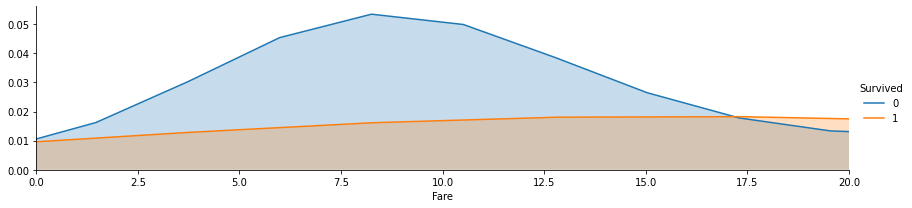

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

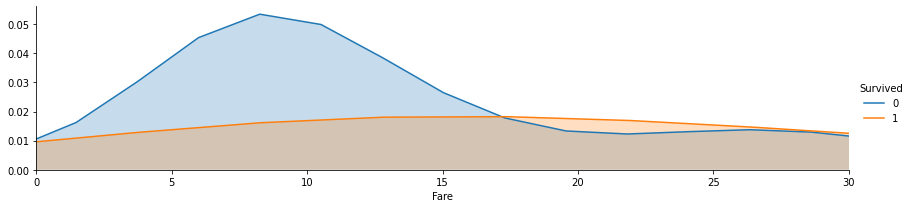

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

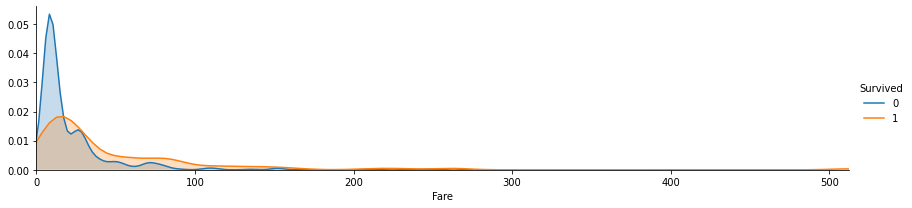

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, titanic_data['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare']<=17,'Fare']=0, 
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <=30),'Fare']=1,
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <=100),'Fare']=2,
    dataset.loc[ dataset['Fare'] >100,'Fare']=3

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,B42,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,C148,1,0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,3.0,C105,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,0


In [ ]:
titanic_data.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
C47            1
A24            1
B30            1
D45            1
B39            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

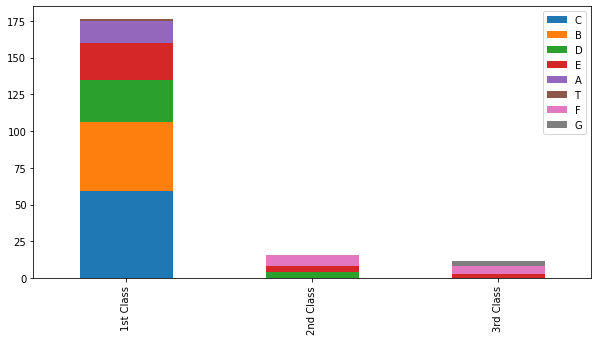

In [ ]:
Pclass1=titanic_data[titanic_data['Pclass']==1]['Cabin'].value_counts()
Pclass2=titanic_data[titanic_data['Pclass']==2]['Cabin'].value_counts()
Pclass3=titanic_data[titanic_data['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
#map the cabins
cabin_mapping={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [ ]:
#fill missing cabin with median fare for each Pclass
titanic_data["Cabin"].fillna(titanic_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
#family size
titanic_data["FamilySize"]=titanic_data["SibSp"]+titanic_data["Parch"]+1
test_data["FamilySize"]=test_data["SibSp"]+test_data["Parch"]+1

(0.0, 11.0)

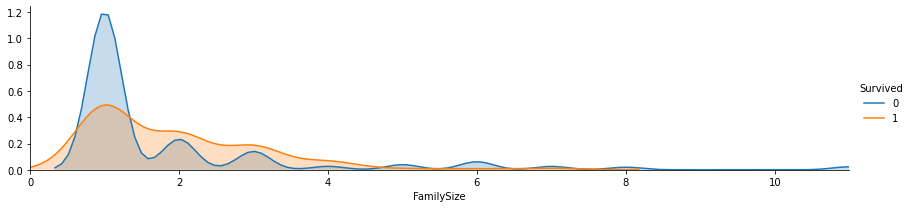

In [ ]:
facet=sns.FacetGrid(titanic_data, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize', shade=True)
facet.set(xlim=(0, titanic_data['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)


In [ ]:
#map the family
family_mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,0.0
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,0.0
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1,1.2
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,0.0


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,2.0,0,0,0.0
414,1306,1,1,3.0,0,0,PC 17758,3.0,0.8,1,3,0.0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,0,0.0
416,1308,3,0,2.0,0,0,359309,0.0,2.0,0,0,0.0


In [ ]:
features_drop=['Ticket', 'SibSp', 'Parch']
titanic_data=titanic_data.drop(features_drop, axis=1)
test_data=test_data.drop(features_drop, axis=1)
titanic_data=titanic_data.drop('PassengerId', axis=1)

In [ ]:
titanic_train_data=titanic_data.drop('Survived', axis=1)
target=titanic_data['Survived']
titanic_train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
titanic_train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0


In [ ]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [ ]:
#knn
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)
clf=KNeighborsClassifier(n_neighbors=100)
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#knn score
round(np.mean(score)*100,2)

[0.74444444 0.82022472 0.7752809  0.71910112 0.75280899 0.83146067
 0.7752809  0.78651685 0.74157303 0.78651685]


77.33

In [ ]:
#decision tree
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#decision tree score
round(np.mean(score)*100,2)

[0.76666667 0.83146067 0.76404494 0.7752809  0.87640449 0.76404494
 0.83146067 0.82022472 0.74157303 0.79775281]


79.69

In [ ]:
#random forest
clf=RandomForestClassifier(n_estimators=100)
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#random forest score
round(np.mean(score)*100,2)

[0.82222222 0.82022472 0.80898876 0.79775281 0.87640449 0.80898876
 0.80898876 0.80898876 0.74157303 0.83146067]


81.26

In [ ]:
#naive bayes
clf=GaussianNB()
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#naive bayes score
round(np.mean(score)*100,2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [ ]:
#svm
clf=SVC()
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#svm score
round(np.mean(score)*100,2)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


83.5

In [ ]:
#logistic regression
clf=LogisticRegression()
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#logistic regression score
round(np.mean(score)*100,2)

[0.8        0.7752809  0.80898876 0.78651685 0.80898876 0.82022472
 0.80898876 0.84269663 0.82022472 0.85393258]


81.26

In [332]:
#linear discrimination analysis
clf=LinearDiscriminantAnalysis()
scoring='accuracy'
score=cross_val_score(clf, titanic_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
#logistic regression score
round(np.mean(score)*100,2)

[0.82222222 0.7752809  0.80898876 0.79775281 0.80898876 0.78651685
 0.82022472 0.83146067 0.83146067 0.84269663]


81.26

In [ ]:
#testing svm
clf=SVC()
clf.fit(titanic_train_data, target)
titanic_test_data=test_data.drop("PassengerId", axis=1).copy()
prediction=clf.predict(titanic_test_data)


In [ ]:
#submission
submission=pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": prediction
})
submission.to_csv('my_submission.csv', index=False)
print("Your submission has been successfully saved.")
submission=pd.read_csv('my_submission.csv')
submission

Your submission has been successfully saved.


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
